In [18]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import numpy as np

In [19]:
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)
cardio1_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
15,46.0,2,172,112.0,120,80,1,1,0,0,0,1


In [22]:
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0


In [23]:
stats.ttest_ind(cardio_0['height'], cardio_1['height'], equal_var = False)

Ttest_indResult(statistic=2.863084313223293, pvalue=0.004196634799464504)

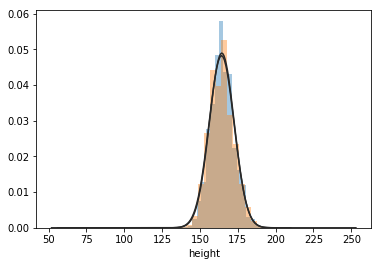

In [24]:
sns.distplot(cardio_0['height'],fit=norm, kde=False)
sns.distplot(cardio_1['height'],fit=norm, kde=False)

In [42]:
#Observed
nosmoke_attack = len(cardio_1[cardio_1["smoke"] == 0])
print(nosmoke_attack)

smoke_attack = len(cardio_1[cardio_1["smoke"] == 1])
smoke_attack

32050


2929

In [49]:
observed=pd.Series([nosmoke_attack,smoke_attack],index = ['non-smoking', 'smoking'])
observed

non-smoking    32050
smoking         2929
dtype: int64

In [44]:
#Expected
nosmoke_noattack = len(cardio_0[cardio_0["smoke"] == 0])
nosmoke_noattack

smoke_noattack = len(cardio_0[cardio_0["smoke"] == 1])
smoke_noattack

3240

In [50]:
expected=pd.Series([nosmoke_noattack, smoke_noattack],index = ['non-smoking', 'smoking'])
expected

non-smoking    31781
smoking         3240
dtype: int64

In [62]:
df = pd.DataFrame([observed,expected]).T

In [67]:
df.columns = ['observed','expected']

In [68]:
df

,observed,expected
non-smoking,32050,31781
smoking,2929,3240


In [69]:
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=32.129024028643556, pvalue=1.4426589626892392e-08)